In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('./data.csv', encoding =  'UTF-8')

In [3]:
data
X = data.iloc[:, 0:4]
Y = data.iloc[:, 5]
X = (X - X.mean())/np.std(X)
Y = (Y - Y.mean())/np.std(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7, random_state=1)

c:\users\yidi\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
pca = PCA(n_components='mle')
pca.fit(X_train)
X_train = pca.transform(X_train)
X_train   # 经过降维之后的主成分矩阵----> 用来进行主成分回归的数
Y_train= (Y_train - Y_train.mean())/np.std(Y)
X_train

array([[ 1.570424  , -0.93829933],
       [-2.30291629, -0.77854422],
       [ 1.08351187,  1.16012196],
       [ 0.32295353,  0.12070028],
       [-2.42997178, -1.28607699],
       [ 0.94438602,  1.02459601],
       [-2.32801688, -0.77829169],
       [-2.16486222, -0.67454388],
       [-1.93978149,  0.1724962 ],
       [ 0.01967437, -0.11280316],
       [-1.32073297,  0.75801798],
       [-1.97618471, -0.58105161],
       [-2.40838564, -1.22822222],
       [ 1.76706079, -0.97252849],
       [ 0.72709636,  1.02691268],
       [ 0.04243175,  0.80995503],
       [ 0.04285174,  1.64586828],
       [-0.56489392, -0.43367922],
       [ 0.76723663,  1.11295505],
       [ 2.05694611, -0.59451562],
       [ 1.09836063, -0.50078143],
       [ 0.36992529,  1.66065839],
       [ 0.06051041,  1.56617018],
       [-1.85288098,  1.97653715],
       [-2.34741203, -1.22598376],
       [-1.87922031,  0.17743686],
       [ 1.09024765,  1.25227001],
       [-2.57313034, -1.28851827],
       [ 0.86909685,

In [5]:
import statsmodels.api as sm
ols = sm.OLS(Y_train, X_train).fit()

In [6]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     297.6
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           6.49e-26
Time:                        22:29:41   Log-Likelihood:                -4.5617
No. Observations:                  45   AIC:                             13.12
Df Residuals:                      43   BIC:                             16.74
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5940      0.024     24.341      0.000       0.545       0.643
x2             0.0673      0.040      1.674      0.101      -0.014       0.148
==============================================================================
Omnibus:                        1.742   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                0.878
Skew:                          -0.245   Prob(JB):                        0.645
Kurtosis:                       3.477   Cond. No.                         1.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
pca.explained_variance_ratio_

array([0.70103682, 0.2586647 ])

In [8]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 'mle',
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [9]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
lr.score(X_train, Y_train)
# X_test = data.iloc[64:, 0:4]
# y_test = data.iloc[64:, 5]

0.9326301840968643

In [11]:
X_test = (X_test - X_test.mean())/np.std(X_test)
X_test = pca.transform(X_test)
X_test

array([[-1.51024245, -0.21962447],
       [-1.71293609, -0.7144579 ],
       [-1.73266676,  1.22094126],
       [ 3.12792355, -0.62282555],
       [-1.53383462,  0.70006592],
       [-1.52774474, -0.61751499],
       [ 1.95957121,  1.06265604],
       [ 1.02538936,  0.96167462],
       [-1.66458408,  1.77898767],
       [-0.59999531, -0.69743499],
       [ 0.46131224, -0.25488547],
       [-0.18712547, -0.6395096 ],
       [-2.119587  , -1.31631745],
       [ 0.55904671, -0.25298001],
       [-0.7278439 , -0.4330191 ],
       [-1.87791862, -1.18051858],
       [-1.62320808,  0.16471934],
       [ 3.11298947, -0.74480309],
       [ 0.52238133,  1.1746119 ],
       [ 1.25089457,  1.03010045]])

In [12]:
y_pred = lr.predict(X_test)


In [13]:

Y_test

51   -1.037059
55   -1.185173
46   -0.921221
2     0.957926
47   -0.884966
53   -1.133002
21    1.404832
26    0.226110
44   -0.715188
40   -0.704134
36    0.158906
39   -0.300026
63   -1.415966
35    0.169517
27    0.345928
58   -1.367332
50   -1.137865
3     1.085083
31    0.095239
24    0.640387
Name: y, dtype: float64

In [14]:
y_pred

array([-0.91181478, -1.06549217, -0.94703505,  1.81600913, -0.86396872,
       -0.94897312,  1.23540678,  0.67373625, -0.86906112, -0.40329085,
        0.25686302, -0.15416136, -1.34751326,  0.31504278, -0.46144457,
       -1.19483491, -0.95306198,  1.79893438,  0.3892856 ,  0.81228255])

Text(0, 0.5, 'The real Y')

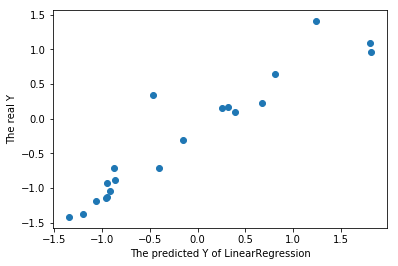

In [15]:
plt.scatter(y_pred, Y_test)
plt.xlabel('The predicted Y of LinearRegression')
plt.ylabel('The real Y')

In [16]:
olsr = sm.OLS(y_pred, Y_test).fit()
olsr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     125.4
Date:                Mon, 10 Jun 2019   Prob (F-statistic):           8.25e-10
Time:                        22:29:42   Log-Likelihood:                -7.7443
No. Observations:                  20   AIC:                             17.49
Df Residuals:                      19   BIC:                             18.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              1.0119      0.090     11.199      0.000       0.823       1.201
==============================================================================
Omnibus:                        7.487   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                6.318
Skew:                          -0.601   Prob(JB):                       0.0425
Kurtosis:                       5.477   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""